In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn import metrics
from sklearn.metrics import classification_report, precision_score, recall_score, accuracy_score, f1_score


np.random.seed(1)

In [2]:
# read data
df = pd.read_csv('../data/preprocessed_models_data.csv')
df.describe()

,SSL SCORE,PREDICTOR RAT VICTIM SHOOTING INCIDENTS,PREDICTOR RAT VICTIM BATTERY OR ASSAULT,PREDICTOR RAT ARRESTS VIOLENT OFFENSES,PREDICTOR RAT GANG AFFILIATION,PREDICTOR RAT NARCOTIC ARRESTS,PREDICTOR RAT TREND IN CRIMINAL ACTIVITY,PREDICTOR RAT UUW ARRESTS,PREDICTOR RAT AGE AT LATEST ARREST_20-30,PREDICTOR RAT AGE AT LATEST ARREST_30-40,PREDICTOR RAT AGE AT LATEST ARREST_40-50,PREDICTOR RAT AGE AT LATEST ARREST_50-60,PREDICTOR RAT AGE AT LATEST ARREST_60-70,PREDICTOR RAT AGE AT LATEST ARREST_70-80,PREDICTOR RAT AGE AT LATEST ARREST_less than 20
count,398684.000000,398684.000000,398684.000000,398684.000000,398684.000000,398684.000000,398684.000000,398684.000000,398684.000000,398684.000000,398684.000000,398684.000000,398684.000000,398684.000000,398684.000000
mean,0.720882,0.020227,0.035916,0.114988,0.162903,0.335752,-0.049534,0.033297,0.352051,0.223648,0.148193,0.086605,0.019625,0.002496,0.167127
std,0.448566,0.152919,0.210601,0.405583,0.369278,0.837828,0.404900,0.193237,0.477610,0.416690,0.355291,0.281256,0.138706,0.049895,0.373090
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-8.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.300000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.200000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,4.000000,10.000000,12.000000,1.000000,29.000000,7.300000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [3]:
# Labels are the values we want to predict
labels = np.array(df['SSL SCORE']) # Y
df = df.drop('SSL SCORE', axis = 1)
x_list = list(df.columns) # X
# Convert to numpy array
df = np.array(df)

In [4]:
X_train, X_test, y_train, y_test = train_test_split(df, labels, test_size = 0.25, random_state = 42)

# Linear Support Vector Machine

In [5]:
clf = svm.SVC(kernel='linear') # Linear Kernel
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

Text(0.5, 427.9555555555555, 'Predicted label')

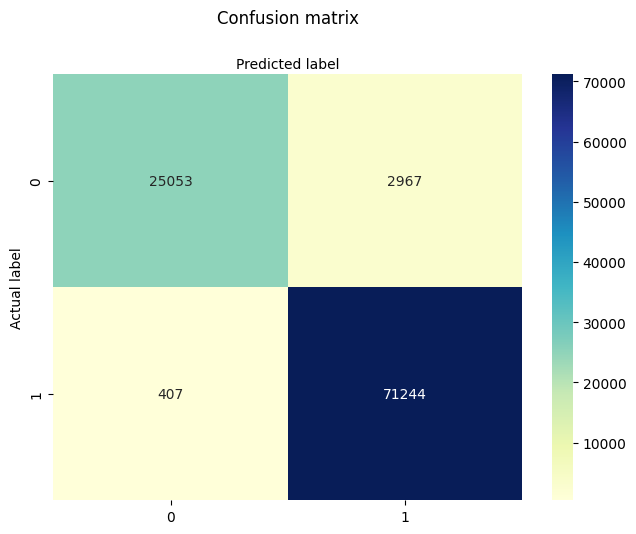

In [6]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [7]:
target_names = ['LOW SSL SCORE', 'HIGH SSL SCORE']
print(classification_report(y_test, y_pred, target_names=target_names))

                precision    recall  f1-score   support

 LOW SSL SCORE       0.98      0.89      0.94     28020
HIGH SSL SCORE       0.96      0.99      0.98     71651

      accuracy                           0.97     99671
     macro avg       0.97      0.94      0.96     99671
  weighted avg       0.97      0.97      0.97     99671



In [8]:
print('Accuracy: %.4f' % accuracy_score(y_test, y_pred))
print('Precision: %.4f' % precision_score(y_test, y_pred))
print('Recall: %.4f' % recall_score(y_test, y_pred))
print('F1 Score: %.4f' % f1_score(y_test, y_pred))

Accuracy: 0.9661
Precision: 0.9600
Recall: 0.9943
F1 Score: 0.9769


# RBF Support Vector Machine

In [9]:
clf = svm.SVC(kernel='rbf') # Linear Kernel
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

Text(0.5, 427.9555555555555, 'Predicted label')

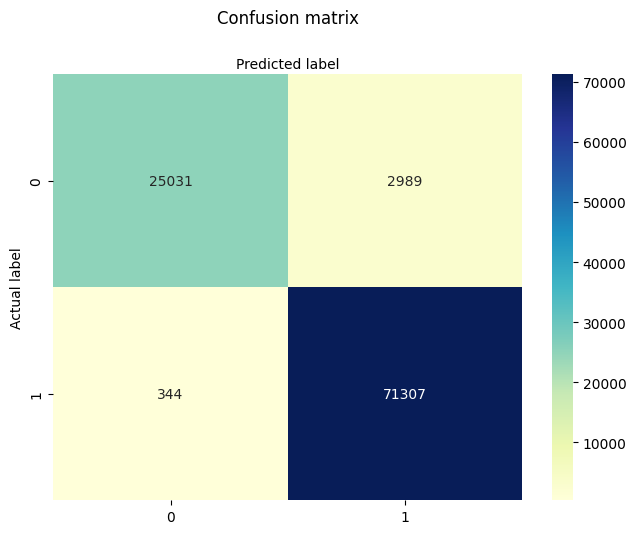

In [10]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [11]:
target_names = ['LOW SSL SCORE', 'HIGH SSL SCORE']
print(classification_report(y_test, y_pred, target_names=target_names))

                precision    recall  f1-score   support

 LOW SSL SCORE       0.99      0.89      0.94     28020
HIGH SSL SCORE       0.96      1.00      0.98     71651

      accuracy                           0.97     99671
     macro avg       0.97      0.94      0.96     99671
  weighted avg       0.97      0.97      0.97     99671



In [13]:
print('Accuracy: %.4f' % accuracy_score(y_test, y_pred))
print('Precision: %.4f' % precision_score(y_test, y_pred))
print('Recall: %.4f' % recall_score(y_test, y_pred))
print('F1 Score: %.4f' % f1_score(y_test, y_pred))

Accuracy: 0.9666
Precision: 0.9598
Recall: 0.9952
F1 Score: 0.9772
